### Project Name: Salary Predictions of Data Professions

### Mission Overview
The aim of this project is to develop a predictive model for the salaries of data professionals by utilizing machine learning techniques. This involves performing exploratory data analysis (EDA), feature engineering, data preprocessing, model training, evaluation, and deployment. Let's break down the tasks and plan our approach:

### Dataset Columns
- **FIRST NAME**: First name of the professional
- **LAST NAME**: Last name of the professional
- **SEX**: Gender of the professional
- **DOJ**: Date of joining the company
- **CURRENT DATE**: Current date of data
- **DESIGNATION**: Job role/designation
- **AGE**: Age of the professional
- **SALARY**: Salary (target variable)
- **UNIT**: Business unit or department
- **LEAVES USED**: Number of leaves used
- **LEAVES REMAINING**: Number of leaves remaining
- **RATINGS**: Performance ratings
- **PAST EXP**: Past work experience
### Project Steps

#### 1. Exploratory Data Analysis (EDA)
- **Data Summary**: Describe the dataset, including the number of entries and features, data types, and any initial observations.
- **Data Cleaning**: Handle missing or inconsistent data.
- **Visualization**: Use plots (e.g., histograms, box plots, scatter plots) to visualize distributions and relationships among variables.
- **Insights**: Extract insights and identify patterns related to salaries.

#### 2. Data Preprocessing
- **Missing Values**: Impute or drop missing values.
- **Encoding**: Encode categorical variables.
- **Scaling**: Standardize or normalize numerical features as needed.

#### 3. Feature Engineering
- **New Features**: Create new features such as `years_with_company` derived from `DOJ` and `CURRENT DATE`.
- **Transformations**: Convert categorical variables into numerical values (e.g., one-hot encoding for `DESIGNATION`, `UNIT`, and `SEX`).
- **Interactions**: Consider interaction terms if they provide additional predictive power.

#### 4. Machine Learning Model Development
- **Model Selection**: Experiment with various regression models including:
  - Linear Regression
  - Decision Trees
  - Random Forests
  - Gradient Boosting
- **Hyperparameter Tuning**: Use techniques like Grid Search or Random Search for optimizing model parameters.

#### 5. Model Evaluation
- **Metrics**: Evaluate models using:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R2) score
- **Model Comparison**: Compare models to select the best-performing one.

#### 6. Recommendations
- **Insights**: Provide insights based on the model's findings, such as key factors influencing salaries.
- **Strategies**: Suggest strategies for job seekers and employers to optimize salary outcomes.

### Import Pakages
- **numpy**:
- **pandas**:
- **matplotlib**:
- **seaborn**:
- **sklearn**:

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## Exploratory Data Analysis (EDA)
- **Data Summary**: Describe the dataset, including the number of entries and features, data types, and any initial observations.
- **Data Cleaning**: Handle missing or inconsistent data.
- **Visualization**: Use plots (e.g., histograms, box plots, scatter plots) to visualize distributions and relationships among variables.
- **Insights**: Extract insights and identify patterns related to salaries.

## **Data Exploration and Cleaning**:
    - Load and inspect the dataset.
    - Clean data, handle missing values, and convert data types if necessary.

### Load Data
- Load the data from a CSV file:

In [2]:
data = pd.read_csv("/kaggle/input/salary-predcition/Salary_Predictions_of_Data_Profession")

 ### Basic Data Inspection
 - Inspect the basic struectre and statistics of the dataset.

In [3]:
# Display the first five row
print("Display the first five rows")
data.head()

Display the first five rows


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
# Display the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 2639 rows and 13 columns.


In [5]:
# Display the column names
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')


In [6]:
# Display summary statistics for numerical columns
print("Display summary statistics for numerical columns")
data.describe()

Display summary statistics for numerical columns


,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [7]:
# Display summary statistics for categorical columns
print("Display summary statistics for categorical columns")
data.describe(include=['object'])

Display summary statistics for categorical columns


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,UNIT
count,2639,2637,2639,2638,2639,2639,2639
unique,2367,2475,2,967,1,6,6
top,ANGEL,APOSTAL,F,10-19-2013,01-07-2016,Analyst,IT
freq,3,2,1344,12,2639,1949,461


In [8]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


In [9]:
# Information About Data
print("Information About columns")
data.info()

Information About columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


###  Visualize the Data
- Visualizations help in understanding the distribution and relationships in your data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


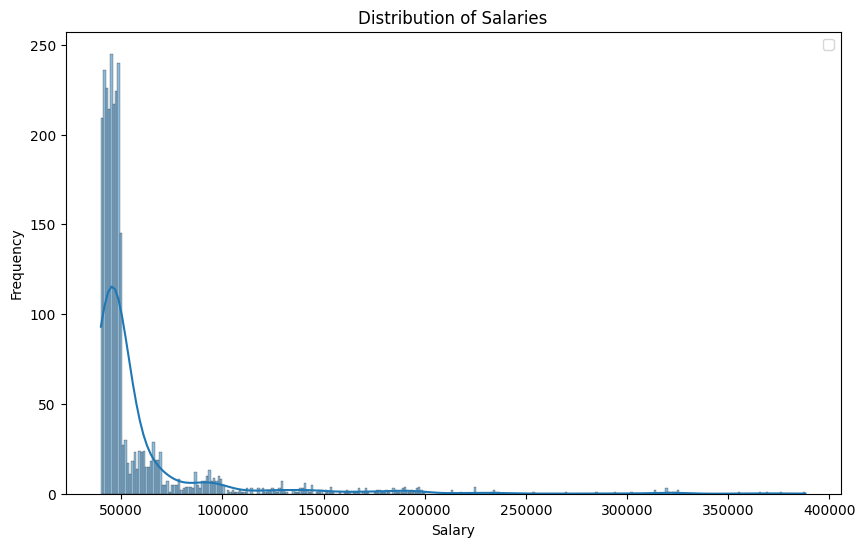

In [10]:
# Visualize the distribution of the target variable 'SALARY'
plt.figure(figsize=(10, 6))
sns.histplot(data['SALARY'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

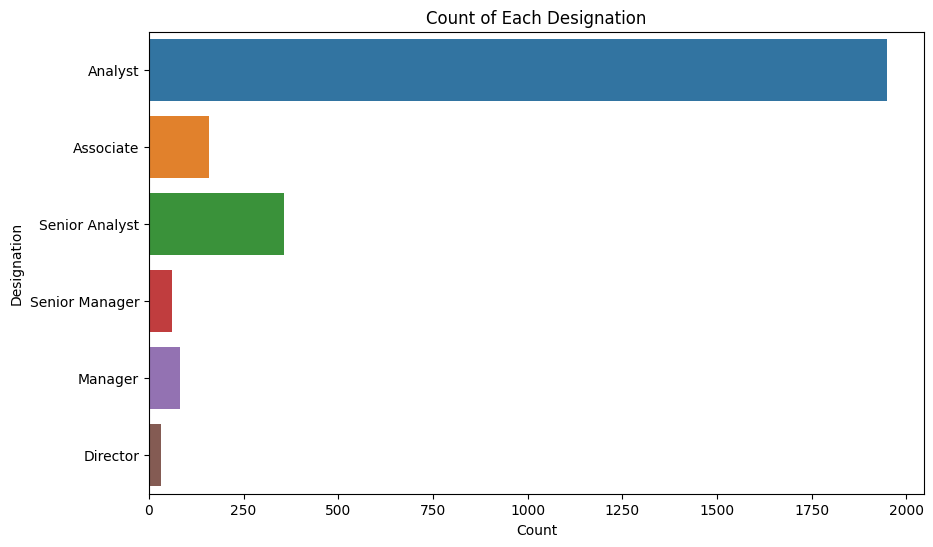

In [11]:
# Visualize the count of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(y=data['DESIGNATION'])
plt.title('Count of Each Designation')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()

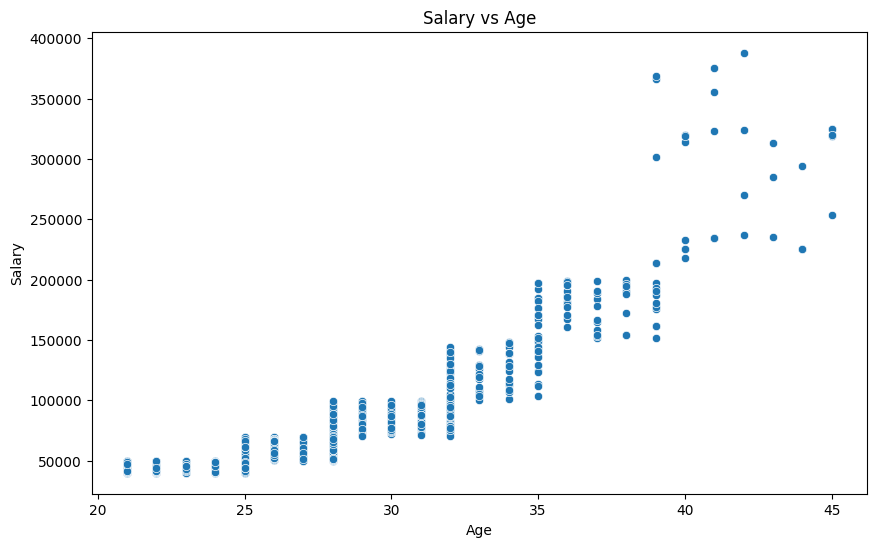

In [12]:
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AGE'], y=data['SALARY'])
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

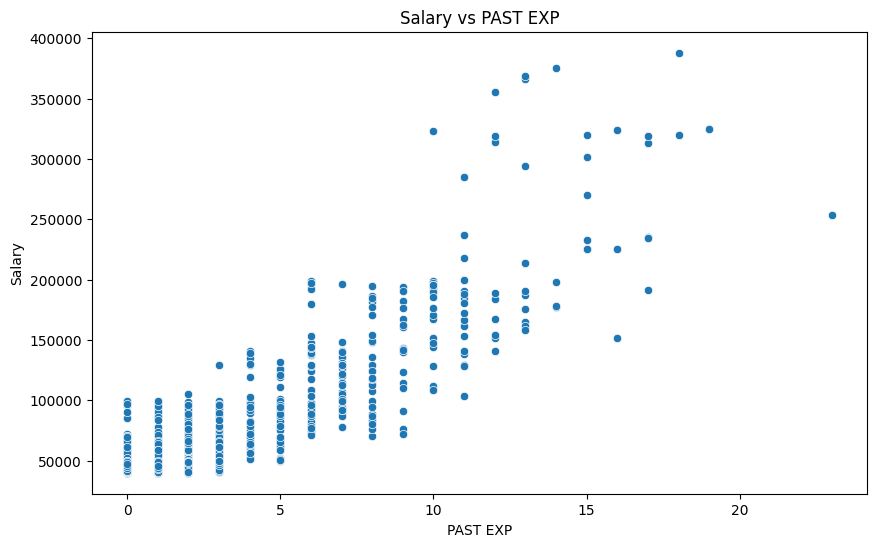

In [13]:
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PAST EXP'], y=data['SALARY'])
plt.title('Salary vs PAST EXP')
plt.xlabel('PAST EXP')
plt.ylabel('Salary')
plt.show()

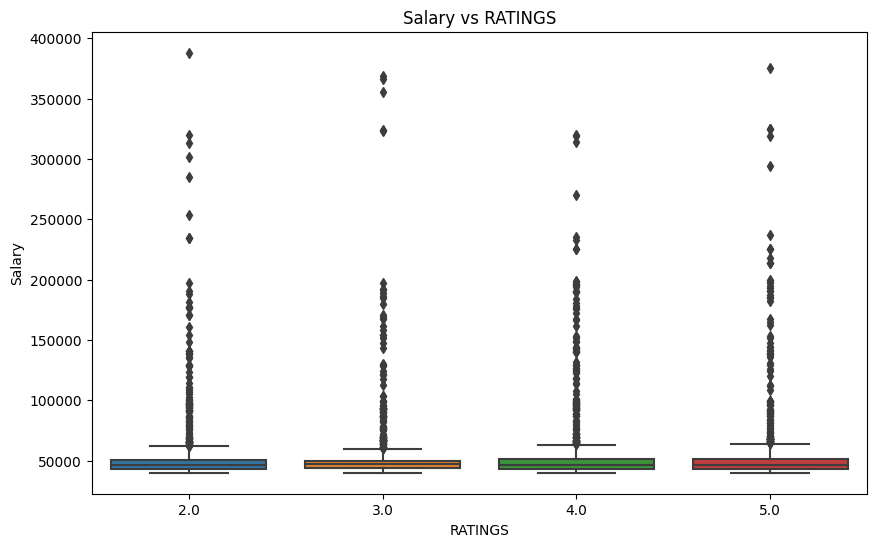

In [14]:
selected_features = ['AGE', 'PAST EXP', 'RATINGS', 'SALARY']
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['RATINGS'], y=data['SALARY'])
plt.title('Salary vs RATINGS')
plt.xlabel('RATINGS')
plt.ylabel('Salary')
plt.show()

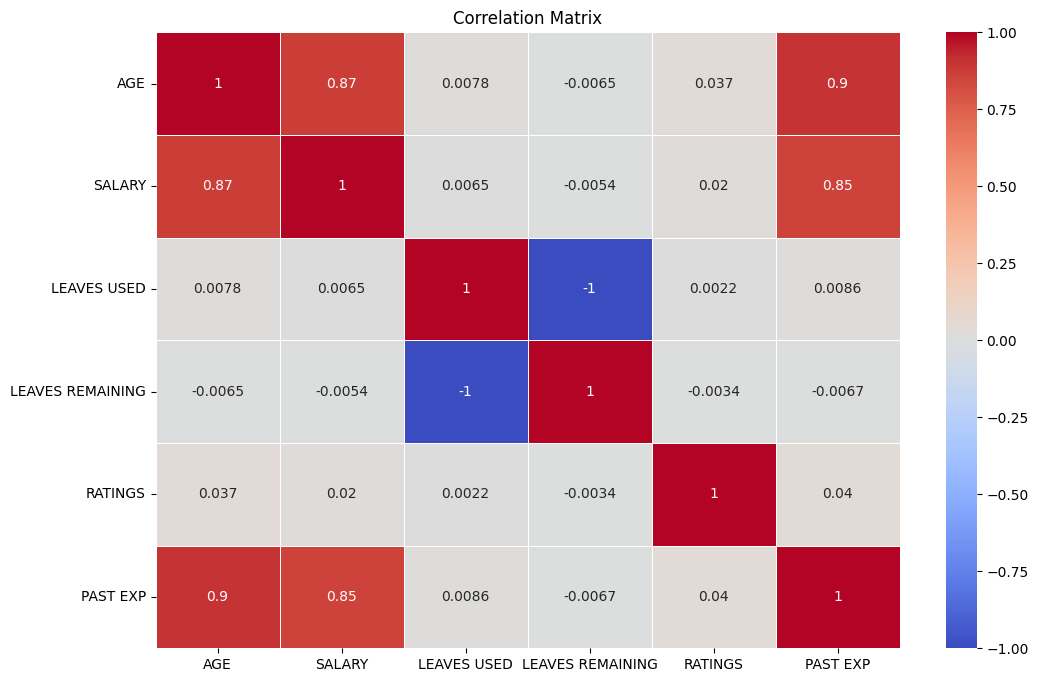

In [15]:
# Correlation heatmap
numarical_data = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
correlation_matrix = data[numarical_data].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

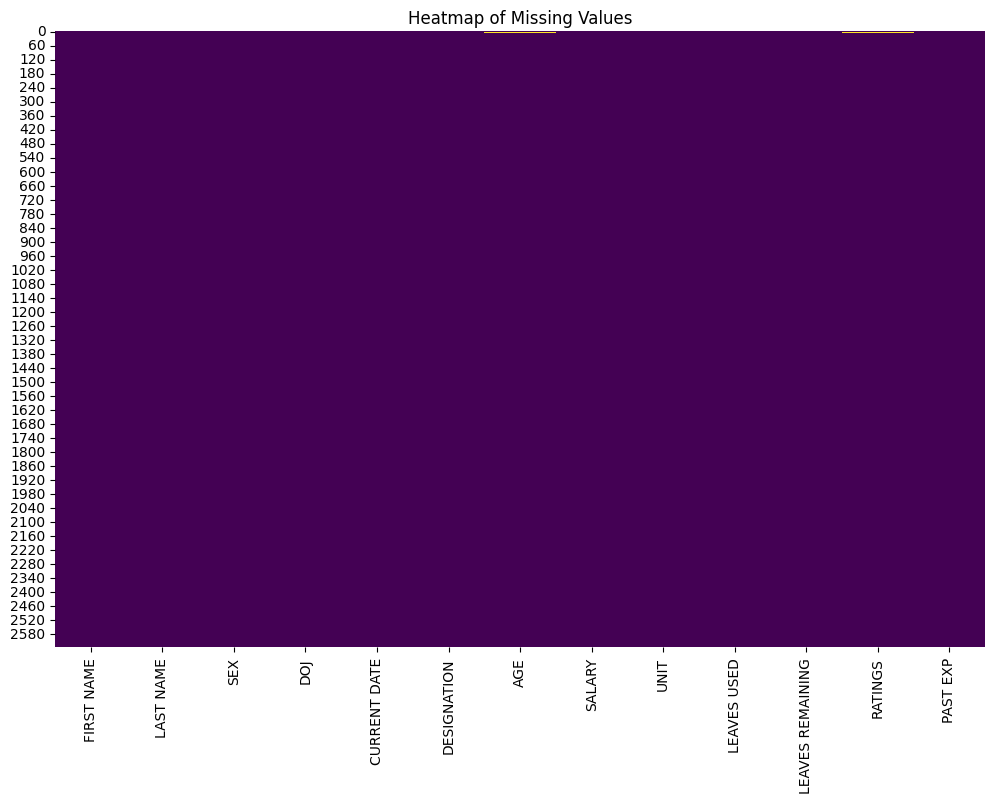

In [16]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

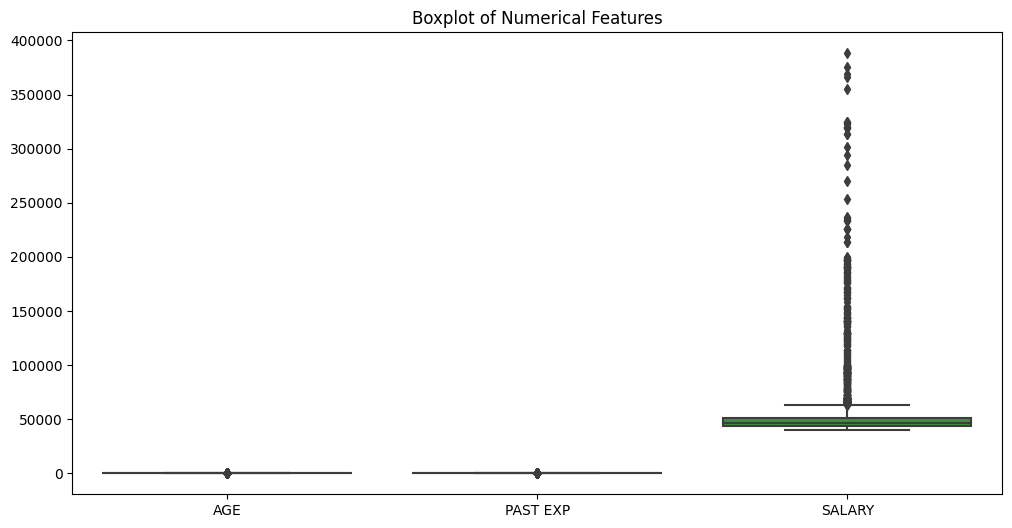

In [17]:
# Boxplot for numerical features to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['AGE', 'PAST EXP', 'SALARY']])
plt.title('Boxplot of Numerical Features')
plt.show()

#### Data Preprocessing
- **Missing Values**: Impute or drop missing values.
- **Encoding**: Encode categorical variables.
- **Scaling**: Standardize or normalize numerical features as needed.

In [18]:
class CleaningData:
    """
    A class used to clean and preprocess the dataset for salary predictions of data professionals.

    Attributes:
    -----------
    df : pd.DataFrame
        The dataset to be cleaned.

    Methods:
    --------
    __init__(df: pd.DataFrame) -> None:
        Initializes the CleaningData class with the dataset.

    remove_duplicates() -> pd.DataFrame:
        Removes duplicate rows from the dataset.

    handle_outliers(column: str, method: str = 'IQR') -> pd.DataFrame:
        Handles outliers in the specified column using the specified method.

    replace_missing_values(strategy: str = 'mean') -> pd.DataFrame:
        Replaces missing values in the dataset using the specified strategy.
    """

    def __init__(self, df: pd.DataFrame) -> None:
        """
        Initializes the CleaningData class with the dataset.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be cleaned.
        """
        self.df = df

    def remove_duplicates(self) -> pd.DataFrame:
        """
        Removes duplicate rows from the dataset.

        Returns:
        --------
        pd.DataFrame
            The dataset with duplicate rows removed.
        """
        self.df = self.df.drop_duplicates()
        return self.df

    def handle_outliers(self, column: str, method: str = 'IQR') -> pd.DataFrame:
        """
        Handles outliers in the specified column using the specified method.

        Parameters:
        -----------
        column : str
            The column in which to handle outliers.
        method : str, optional
            The method to use for handling outliers (default is 'IQR').

        Returns:
        --------
        pd.DataFrame
            The dataset with outliers handled.
        """
        if method == 'IQR':
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.df = self.df[(self.df[column] >= lower_bound) & (self.df[column] <= upper_bound)]
        elif method == 'z-score':
            from scipy.stats import zscore
            self.df = self.df[(zscore(self.df[column]) < 3).all(axis=1)]
        return self.df

    def replace_missing_values(self, column: str = 'DOJ', strategy: str = 'mode') -> pd.DataFrame:
        """
        Replaces missing values in the specified column using the specified strategy.

        Parameters:
        -----------
        column : str
            The name of the column to handle missing values.
        strategy : str, optional
            The strategy to use for replacing missing values (default is 'mean').
            Options: 'mean', 'median', 'mode'

        Returns:
        --------
        pd.DataFrame
            The DataFrame with missing values replaced.
        """
        if strategy == 'mean':
            self.df[column] = self.df[column].fillna(self.df[column].mean())
        elif strategy == 'median':
            self.df[column] = self.df[column].fillna(self.df[column].median())
        elif strategy == 'mode':
            self.df[column] = self.df[column].fillna(self.df[column].mode().iloc[0])
        return self.df


import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class PreprocessData:
    """
    A class used to preprocess the dataset for salary predictions of data professionals.

    Attributes:
    -----------
    df : pd.DataFrame
        The dataset to be preprocessed.
    
    Methods:
    --------
    __init__(df: pd.DataFrame) -> None:
        Initializes the PreprocessData class with the dataset.
    
    scaling() -> pd.DataFrame:
        Scales numerical features in the dataset using MinMaxScaler.
    
    one_hot_encode(columns: list) -> pd.DataFrame:
        Applies one-hot encoding to the specified columns.

    label_encode(columns: list) -> pd.DataFrame:
        Applies label encoding to the specified columns.
        
    zero_encode(columns: list) -> pd.DataFrame:
        Encodes specified columns to zero.
    """

    def __init__(self, df: pd.DataFrame) -> None:
        """
        Initializes the PreprocessData class with the dataset.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be preprocessed.
        """
        self.df = df

    def scaling(self) -> pd.DataFrame:
        """
        Scales numerical features in the dataset using MinMaxScaler.

        Returns:
        --------
        pd.DataFrame
            The dataset with scaled numerical features.
        """
        scaler = MinMaxScaler()
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df[numerical_cols] = scaler.fit_transform(self.df[numerical_cols])
        return self.df

    def one_hot_encode(self, columns: list) -> pd.DataFrame:
        """
        Applies one-hot encoding to the specified columns.

        Parameters:
        -----------
        columns : list
            The list of columns to be one-hot encoded.
        
        Returns:
        --------
        pd.DataFrame
            The dataset with one-hot encoded columns.
        """
        self.df = pd.get_dummies(self.df, columns=columns, drop_first=True)
        return self.df

    def label_encode(self, columns: list) -> pd.DataFrame:
        """
        Applies label encoding to the specified columns.

        Parameters:
        -----------
        columns : list
            The list of columns to be label encoded.

        Returns:
        --------
        pd.DataFrame
            The dataset with label encoded columns.
        """
        label_encoders = {}
        for column in columns:
            label_encoders[column] = LabelEncoder()
            self.df[column] = label_encoders[column].fit_transform(self.df[column])
        return self.df

    def zero_encode(self, columns: list) -> pd.DataFrame:
        """
        Encodes specified columns to zero.

        Parameters:
        -----------
        columns : list
            The list of columns to be encoded to zero.

        Returns:
        --------
        pd.DataFrame
            The dataset with specified columns encoded to zero.
        """
        for column in columns:
            self.df[column] = 0
        return self.df

In [19]:
cleaning_data = CleaningData(df=data)
cleaning_data.remove_duplicates()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


### Missing Values in Each Column

Below is the information on missing values in the dataset, including the statistics for the numerical columns:

| Column            | Missing Values | Column Type  | Mean       | Standard Deviation | Min      | 25th Percentile | 75th Percentile | Max      |
|-------------------|----------------|--------------|------------|--------------------|----------|-----------------|-----------------|----------|
| LAST NAME         | 2              | Categorical  | -          | -                  | -        | -               | -               | -        |
| DOJ               | 1              | Date         | -          | -                  | -        | -               | -               | -        |
| AGE               | 3              | Numerical    | 24.756449  | 3.908228           | 21.0     | 22.0            | 25.0            | 45.0     |
| LEAVES USED       | 3              | Numerical    | 22.501517  | 4.604469           | 15.0     | 19.0            | 26.0            | 30.0     |
| LEAVES REMAINING  | 2              | Numerical    | 7.503223   | 4.603193           | 0.0      | 4.0             | 11.0            | 15.0     |
| RATINGS           | 2              | Numerical    | 3.486159   | 1.114933           | 2.0      | 2.0             | 4.0             | 5.0      |

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Replace missing values using specified strategies
cleaned_df = cleaning_data.replace_missing_values(column='LAST NAME', strategy='mode')
cleaned_df = cleaning_data.replace_missing_values(column='DOJ', strategy='mode')
cleaned_df = cleaning_data.replace_missing_values(column='AGE', strategy='median')
cleaned_df = cleaning_data.replace_missing_values(column='LEAVES USED', strategy='mean')
cleaned_df = cleaning_data.replace_missing_values(column='RATINGS', strategy='median')
cleaned_df = cleaning_data.replace_missing_values(column='LEAVES REMAINING', strategy='median')

### Encoding Categorical Data

In this project, we'll encode categorical variables to make them suitable for machine learning algorithms. Below is the plan for encoding each categorical column:

- **`FIRST NAME`**: Encode to `0`.
- **`LAST NAME`**: Encode to `0`.
- **`SEX`**: Use one-hot encoding.
- **`DOJ` (Date of Joining)**: Use label encoding.
- **`CURRENT DATE`**: Use one-hot encoding.
- **`DESIGNATION`**: Use label encoding.
- **`UNIT`**: Use label encoding.

### Implementation

In [21]:
# Preprocess the data
preprocessor = PreprocessData(df=cleaned_df)

# Zero encode specific columns
preprocessor_df = preprocessor.zero_encode(columns=['FIRST NAME', 'LAST NAME'])
preprocessor_df = preprocessor.one_hot_encode(columns=['SEX', 'CURRENT DATE'])
preprocessor_df = preprocessor.label_encode(columns=['DOJ', 'DESIGNATION', 'UNIT'])

#### Scaling

Numerical columns are scaled using MinMaxScaler to ensure all values are within a similar range, improving the performance of certain machine learning algorithms.

In [22]:
# Scalling all dataFrame
scaling = PreprocessData(df=preprocessor_df) 
scaling_df = preprocessor.scaling()

### Split Data

- **'X_train'**: The training set features
- **'X_test'**: The test set features
- **'y_train'**: The training set target variable
- **'y_test'**: The test set target variable

The data is split into training and test sets to evaluate the model's performance on unseen data, ensuring that the model generalizes well and avoids overfitting.

In [23]:
# Class  for SplitData

from sklearn.model_selection import train_test_split
import pandas as pd

class SplitData:
    """
    A class used to split the dataset into training and testing sets.

    Attributes:
    -----------
    X_train : pd.DataFrame
        Training feature set.
    X_test : pd.DataFrame
        Testing feature set.
    y_train : pd.Series
        Training target set.
    y_test : pd.Series
        Testing target set.

    Methods:
    --------
    __init__() -> None:
        Initializes the SplitData class.

    split(df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = None) -> tuple:
        Splits the dataset into training and testing sets.
    """

    def __init__(self) -> None:
        """
        Initializes the SplitData class.
        """
        self.X_train = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.y_train = pd.Series()
        self.y_test = pd.Series()

    def split(self, df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = None) -> tuple:
        """
        Splits the dataset into training and testing sets.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be split.
        
        target : str
            The target column name in the dataset.
        
        test_size : float, optional
            The proportion of the dataset to include in the test split (default is 0.2).
        
        random_state : int, optional
            The random seed used by the random number generator (default is None).
        
        Returns:
        --------
        tuple:
            A tuple containing the training feature set, testing feature set, training target set, and testing target set.
        """
        X = df.drop(columns=[target])
        y = df[target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return self.X_train, self.X_test, self.y_train, self.y_test

In [24]:
split = SplitData()
X_train, X_test, y_train, y_test = split.split(df=scaling_df, target='SALARY', test_size=0.2, random_state=42)

## Model and Training
#### Algorithm
- **SVR (Support Vector Regression)**
- **LR (Linear Regression)**
- **RFR (Random Forest Regression)**

#### Tuning
- pass

In [33]:
# Class for mode and class for Uning HyperParaneters
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd

class TuningHyperparameters:
    """
    A class used to perform hyperparameter tuning for various models.

    Models:
    -------
    - Support Vector Regression (SVR)
    - Linear Regression
    - Random Forest Regression

    Attributes:
    -----------
    svr_params_gird: dict
        Hyperparameters for tuning SVR.
    linear_regression_params_grid: dict
        Hyperparameters for tuning Linear Regression.
    random_forest_regression_params_grid: dict
        Hyperparameters for tuning Random Forest Regression.

    Methods:
    --------
    __init__(learning_rate: float = 0.02) -> None:
        Initializes the TuningHyperparameters class with the specified learning rate.

    rune_svr(X: pd.DataFrame, y: pd.Series) -> dict:
        Tunes hyperparameters for Support Vector Regression model.
    
    rune_linear_regression(X: pd.DataFrame, y: pd.Series) -> dict:
        Tunes hyperparameters for Linear Regression model.
    
    rune_random_forest_regression(X: pd.DataFrame, y: pd.Series) -> dict:
        Tunes hyperparameters for Random Forest Regression model.
    """
    def __init__(self, learning_rate: float = 0.02) -> None:
        """
        Initializes the TuningHyperparameters class with the specified learning rate.

        Parameters:
        -----------
        learning_rate : float, optional
            Learning rate for model where applicable (default = 0.02).
        """
        self.learning_rate = learning_rate
        self.svr_param_grid = {
            'C': [0.001, 0.01],
            'kernel': ['linear'],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto'],
            'coef0': [0.0, 0.1, 0.5],
            'tol': [1e-3, 1e-4, 1e-5],
            'epsilon': [0.1, 0.2, 0.5],
            'shrinking': [True, False],
            'cache_size': [200],
            'verbose': [False],
            'max_iter': [1000, -1]
        }

        self.linear_regression_param_grid = {
            'fit_intercept': [True],
            'copy_X': [True],
            'n_jobs': [-1, 1, 2, 4],
            'positive': [False]
        }

        self.random_forest_param_grid = {
            'n_estimators': [100],
            'criterion': ['squared_error'],
            'max_depth': [10],
            'min_samples_split': [5],
            'min_samples_leaf': [24],
            'min_weight_fraction_leaf': [0.1],
            'max_features': ['log2'],
            'max_leaf_nodes': [10],
            'min_impurity_decrease': [0.1],
            'bootstrap': [True],
            'oob_score': [True],
            'n_jobs': [2],
            'random_state': [42],
            'verbose': [1],
            'warm_start': [True],
            'ccp_alpha': [0.1],
            'max_samples': [0.9]
        }
    
    def tune_svr(self, X: pd.DataFrame, y: pd.Series) -> dict:
        """
        Tunes hyperparameters for Support Vector Regression model.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.


        Returns:
        --------
        dict
            The best parameters for SVR model.
        """
        svr = SVR()
        svr_grid_search = GridSearchCV(estimator=svr, param_grid=self.svr_param_grid, cv=5, n_jobs=-1, verbose=1)
        svr_grid_search.fit(X, y)
        return svr_grid_search.best_params_
    
    def tune_linear_regression(self, X: pd.DataFrame, y: pd.Series) -> dict:
        """
        Tunes hyperparameters for Linear Regression model.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.
        
        Returns:
        --------
        dict
            The best parameters for Linear Regression model.
        """
        linear_regression = LinearRegression()
        linear_regression_grid_search = GridSearchCV(estimator=linear_regression, param_grid=self.linear_regression_param_grid)
        linear_regression_grid_search.fit(X, y)

        return linear_regression_grid_search.best_params_
    
    def tune_random_forest_regression(self, X: pd.DataFrame, y: pd.Series) -> dict:
        """
        Tunes hyperparameters for Random Forest Regression model.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.
        
        Returns:
        --------
        dict
            The best parameters for Random Forest Regression model.
        """
        random_forest_regression = RandomForestRegressor()
        random_forest_regression_grid_search = GridSearchCV(estimator=random_forest_regression, param_grid=self.random_forest_param_grid)
        random_forest_regression_grid_search.fit(X, y)

        return random_forest_regression_grid_search.best_params_

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import joblib


class MLModel(TuningHyperparameters):
    """
    A class for building and training machine learning models using tuned hyperparameters.

    Algorithms:
    -----------
    - Support Vector Regression (SVR)
    - Linear Regression
    - Random Forest Regression

    Attributes:
    -----------
    learning_rate : float
        Learning rate for model where applicable (default = 0.02).
    
    model : Any
        The machine learning model to be used.

    Methods:
    --------
    __init__(self, learning_rate: float = 0.02) -> None:
        Initializes the MLModel class with the specified learning rate.
    
    train_model(X: pd.DataFrame, y: pd.Series, algorithm: str) -> None:
        Trains the specified machine learning algorithm with the best hyperparameters.
    
    save_model(model_path: str) -> None:
        Saves the trained machine learning model to a joblib file.
    """
    def __init__(self, learning_rate: float = 0.02) -> None:
        """
        Initialize the MLModel class with the specified learning rate

        Parameters:
        -----------
        learning_rate : float, optional
            Learning rate for model where applicable (default = 0.02).
        """
        super().__init__(learning_rate)
        self.model = None
    
    def train_model(self, X: pd.DataFrame, y: pd.Series, algorithm: str) -> None:
        """
        Train the specified machine learning algorithm with the best hyperparameters.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.
        
        y : pd.Series
            The target variable.

        algorithm : str
            The alogrithm to be used for training. Options: ['svr', 'linear_regression', 'random_forest_regression']
        """
        if algorithm == 'SVR':
            best_params = self.tune_svr(X, y)
            self.model = SVR(**best_params)
        elif algorithm == 'linear_regression':
            best_params = self.tune_linear_regression(X, y)
            self.model = LinearRegression(**best_params)
        elif algorithm == 'random_forest_regression':
            best_params = self.tune_random_forest_regression(X, y)
            self.model = RandomForestRegressor(**best_params)
        else:
            raise ValueError(f'Invalid algorithm: {algorithm}')
        
        self.model.fit(X, y)

    def save_model(self,model, model_path: str) -> None:
        """
        Saves the trained machine learning model to a joblib file.

        Parameters:
        -----------
        model : Model
            Pss the model to save
        model_path : str
            The path to the joblib file where the model will be saved.
        """
        model = joblib.dump(self.model, model_path)

In [26]:
# Hyperparameter Tuning
hyper_tuner = TuningHyperparameters()
best_params_svr = hyper_tuner.tune_svr(X_train, y_train)
best_params_lr = hyper_tuner.tune_linear_regression(X_train, y_train)
best_params_rf = hyper_tuner.tune_random_forest_regression(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_job

In [34]:
warnings.filterwarnings('ignore') 
# Train Models
model = MLModel()
svr_model = model.train_model(X_train, y_train, algorithm='SVR')
lr_model = model.train_model(X_train, y_train, algorithm='linear_regression')
rf_model = model.train_model(X_train, y_train, algorithm='random_forest_regression')

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_job

In [35]:
# Save Model
model.save_model(svr_model, "svr_model.joblib")
model.save_model(lr_model, "lr_model.joblib")
model.save_model(rf_model, "rf_model.joblib")

## Predaction

In [36]:
import joblib 
import pandas as pd


class Prediction():
    """
    A class used for loading a machine learning model and making predictions.

    Attributes:
    -----------
    model : Any
        The machine learning model to be used for predictions.
    
    Methods:
    --------
    __init__() -> None:
        Initialize the Prediction class and the parent PreprocessData class.
    
    load_model(model_path: str) -> None:
        Loads the machine learning model from a joblib file.
    
    predict(data: pd.DataFrame) -> pd.Series:
        Makes predictions using the loaded model on the preprocessed data.
    """
    def __init__(self, df: pd.DataFrame) -> None:
        """
        Initializes the Prediction class and the parent PreprocessData class.

        df : pd.DataFrame
            The data for make predict
        """
        self.model = None
        self.data = df
    
    def load_model(self, mode_path: str) -> None:
        """
        Loads the machine learning model from a joblib file.

        Parameters:
        -----------
        model_path : str
            The path to the joblib file containing the saved model.
        """
        self.model = joblib.load(mode_path)

    def predict(self) -> pd.Series:
        """
        Makes predictions using the loaded model on the preprocessed data.


        Returns:
        ---------
        pd.Series
            The predcitions made by the model.
        """
        # Check if the model is loaded
        if self.model is None:
            raise ValueError("Model is not loaded. Please load a model using the load_model method.")
        
        # Make predictions
        predictions = self.model.predict(self.data)
        return pd.Series(predictions)

In [44]:
# Initialize the Prediction class
predictor_svr = Prediction(X_test)
predictor_lr = Prediction(X_test)
predictor_rf = Prediction(X_test)


# Load the model
predictor_svr.load_model('/kaggle/working/svr_model.joblib')
predictor_lr.load_model('/kaggle/working/lr_model.joblib')
predictor_rf.load_model('/kaggle/working/rf_model.joblib')


# Make predictions
predictions_svr = predictor_svr.predict()
prediction_lr = predictor_lr.predict()
predictions_rf = predictor_rf.predict()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


## Evaluation
- **'R2'**: 
- **'MAE'**:
- **'MdAE'**:
- **'MSE'**:

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error
import pandas as pd
class Evaluation:
    """
    Class for evaluating machine learning models.

    Attributes:
    -----------
    y_true : pd.Series
        The true values.
    y_pred : pd.Series
        The predicted values.
    r2_score_val : float
        The R-squared score.
    mae_val : float
        The Mean Absolute Error.
    mdae_val : float
        The Median Absolute Error.
    mse_val : float
        The Mean Squared Error.

    Methods:
    --------
    __init__(self, y_true: pd.Series, y_pred: pd.Series) -> None:
        Initializes the Evaluation class with true and predicted values.
    
    r2(self) -> float:
        Calculates and returns the R-squared score.
    
    MAE(self) -> float:
        Calculates and returns the Mean Absolute Error.
    
    MdAE(self) -> float:
        Calculates and returns the Median Absolute Error.
    
    MSE(self) -> float:
        Calculates and returns the Mean Squared Error.
    """

    def __init__(self, y_true: pd.Series, y_pred: pd.Series) -> None:
        """
        Initializes the Evaluation class with true and predicted values.

        Parameters:
        -----------
        y_true : pd.Series
            The true values.
        
        y_pred : pd.Series
            The predicted values.
        """
        self.y_true = y_true
        self.y_pred = y_pred
        self.r2_score_val = None
        self.mae_val = None
        self.mdae_val = None
        self.mse_val = None

    def r2(self) -> float:
        """
        Calculates and returns the R-squared score.

        Returns:
        --------
        float
            The R-squared score.
        """
        self.r2_score_val = r2_score(self.y_true, self.y_pred)
        return self.r2_score_val

    def MAE(self) -> float:
        """
        Calculates and returns the Mean Absolute Error.

        Returns:
        --------
        float
            The Mean Absolute Error.
        """
        self.mae_val = mean_absolute_error(self.y_true, self.y_pred)
        return self.mae_val

    def MdAE(self) -> float:
        """
        Calculates and returns the Median Absolute Error.

        Returns:
        --------
        float
            The Median Absolute Error.
        """
        self.mdae_val = median_absolute_error(self.y_true, self.y_pred)
        return self.mdae_val

    def MSE(self) -> float:
        """
        Calculates and returns the Mean Squared Error.

        Returns:
        --------
        float
            The Mean Squared Error.
        """
        self.mse_val = mean_squared_error(self.y_true, self.y_pred)
        return self.mse_val

In [48]:
# Evaluate SVR
evaluator = Evaluation(y_test, predictions_svr)
svr_r2 = evaluator.r2()
svr_mae = evaluator.MAE()
svr_mdae = evaluator.MdAE()
svr_mse = evaluator.MSE()

# Evaluate LR
evaluator = Evaluation(y_test, prediction_lr)
lr_r2 = evaluator.r2()
lr_mae = evaluator.MAE()
lr_mdae = evaluator.MdAE()
lr_mse = evaluator.MSE()

# Evaluate RF
evaluator = Evaluation(y_test, predictions_rf)
rf_r2 = evaluator.r2()
rf_mae = evaluator.MAE()
rf_mdae = evaluator.MdAE()
rf_mse = evaluator.MSE()

print(f"SVR Model - R2: {svr_r2}, MAE: {svr_mae}, MdAE: {svr_mdae}, MSE: {svr_mse}")
print(f"Linear Regression Model - R2: {lr_r2}, MAE: {lr_mae}, MdAE: {lr_mdae}, MSE: {lr_mse}")
print(f"Random Forest Model - R2: {rf_r2}, MAE: {rf_mae}, MdAE: {rf_mdae}, MSE: {rf_mse}")

SVR Model - R2: -0.006016245198145809, MAE: 0.053293821151016926, MdAE: 0.03945724208657583, MSE: 0.007106978174564702
Linear Regression Model - R2: -0.006016245198145809, MAE: 0.053293821151016926, MdAE: 0.03945724208657583, MSE: 0.007106978174564702
Random Forest Model - R2: -0.006016245198145809, MAE: 0.053293821151016926, MdAE: 0.03945724208657583, MSE: 0.007106978174564702
